# <span style="color: blue; font-weight:bold"> Employee Turnover Analytics </span> 
## <span style="color: blue; font-weight:bold"> Course-End Project 

In [759]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [660]:
df = pd.read_csv("HR_comma_sep.csv")
df = pd.DataFrame(df)

In [661]:
############################################################################################
def correlation_func(df, threshold):
# Compute correlation matrix
    corr_matrix = df.corr().abs()  # use abs() to consider both positive & negative correlations

# Mask the diagonal and lower triangle (self-correlations and duplicates)
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Apply the mask
    upper_triangle = corr_matrix.where(mask)

# Set your threshold
    #threshold = 0.7

# Count how many correlations are above the threshold
    high_corr_pairs = (upper_triangle > threshold).sum().sum()

    print(f"Number of feature pairs with correlation |abs| > {threshold}: {high_corr_pairs}")
############################################################################################
def summary(df_csv):
    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        "Data Type": df_csv.dtypes,
        "Memory Used": df_csv.memory_usage(deep=True),
        "Nunique": df_csv.nunique(),
        "Max": df_csv.select_dtypes(include='number').max(),
        "Min": df_csv.select_dtypes(include='number').min(),
        "Missing": df_csv.isnull().sum(),
        'Whitespace': df_csv.map(lambda x: isinstance(x, str) and x.strip() == '').sum()
    })

    summary_df["Min"] = summary_df["Min"].fillna("N/A")
    summary_df["Max"] = summary_df["Max"].fillna("N/A")
    return summary_df

############################################################################################

## <span style="color: brown; font-weight:bold">  TASK_1: Perform data quality checks by checking for missing values, if any.

In [662]:
summary(df)  

,Data Type,Memory Used,Nunique,Max,Min,Missing,Whitespace
Index,NaN,132,NaN,N/A,N/A,NaN,NaN
Work_accident,int64,119992,2.0,1.0,0.0,0.0,0.0
average_monthly_hours,int64,119992,215.0,310.0,96.0,0.0,0.0
last_evaluation,float64,119992,65.0,1.0,0.36,0.0,0.0
left,int64,119992,2.0,1.0,0.0,0.0,0.0
number_project,int64,119992,6.0,7.0,2.0,0.0,0.0
promotion_last_5years,int64,119992,2.0,1.0,0.0,0.0,0.0
salary,object,800523,3.0,N/A,N/A,0.0,0.0
sales,object,835215,10.0,N/A,N/A,0.0,0.0
satisfaction_level,float64,119992,92.0,1.0,0.09,0.0,0.0


In [765]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,duplicate_flag
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1
5,0.41,0.50,2,153,3,0,1,0,sales,low,1
6,0.10,0.77,6,247,4,0,1,0,sales,low,1
7,0.92,0.85,5,259,5,0,1,0,sales,low,1
8,0.89,1.00,5,224,5,0,1,0,sales,low,1
9,0.42,0.53,2,142,3,0,1,0,sales,low,1


In [763]:
df.shape

(14999, 11)

In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [665]:
# Check for duplicates
has_duplicates = df.duplicated(keep=False).any()
print(f"Has duplicates: {has_duplicates}")
print(f"Total number of duplicated rows: {df.duplicated(keep=False).sum()}")

Has duplicates: True
Total number of duplicated rows: 5346


In [666]:
# How many rows occur 2, 3, 4+ times.
df_duplicated = df[df.duplicated(keep=False)]
df_duplicated.value_counts().value_counts()

count
2    1676
3     656
4       5
6       1
Name: count, dtype: int64

### <span style="color: red">  Observation :
    * NO missing data
    * 5,346 dublicated rows
#### <span style="color: red">  Next :
    * rename df['sales'] to df['Department']
    * perform a two-sample t-test to determine if the duplicated rows are random or proved statistical data

In [ ]:
############## T-TEST statr #######################

### <span style="color: green"> Perform a two-sample t-test to determine if the duplicated rows are random or proved statistical data

### Hypothesis:

* H0 (Null Hypothesis): The duplicated rows are random and do not represent a meaningful statistical pattern.

* H1 (Alternative Hypothesis): The duplicated rows are systematically DIFFERENT — representing a group of people with shared features (e.g., same job, performance level, etc.).

In [667]:
from scipy.stats import ttest_ind, chi2_contingency

In [668]:
# Step 1: Identify Duplicates Non-Duplicates
duplicates = df[df.duplicated(keep=False)]
non_duplicates = df[~df.duplicated(keep=False)]
print(f"Duplicates: {len(duplicates)}, Non-Duplicates: {len(non_duplicates)}")

# Step 2: Split and Test
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include='object').columns

# T-tests for numerical features
print("\n----- T-test results for numerical features: -----\n")
for col in num_cols:
    _, pval = ttest_ind(duplicates[col], non_duplicates[col], equal_var=False)
    print(f"{col}: p-value = {pval:.8f} {'< 0.05 => DIFFERENT (Rejrct the H0 hypothesis)' if pval < 0.05 else '=> similar (no significant difference)'}")

Duplicates: 5346, Non-Duplicates: 9653

----- T-test results for numerical features: -----

satisfaction_level: p-value = 0.00000000 < 0.05 => DIFFERENT (Rejrct the H0 hypothesis)
last_evaluation: p-value = 0.26369258 => similar (no significant difference)
number_project: p-value = 0.99100039 => similar (no significant difference)
average_monthly_hours: p-value = 0.00074761 < 0.05 => DIFFERENT (Rejrct the H0 hypothesis)
time_spend_company: p-value = 0.00000000 < 0.05 => DIFFERENT (Rejrct the H0 hypothesis)
Work_accident: p-value = 0.00000000 < 0.05 => DIFFERENT (Rejrct the H0 hypothesis)
left: p-value = 0.00000000 < 0.05 => DIFFERENT (Rejrct the H0 hypothesis)
promotion_last_5years: p-value = 0.00000000 < 0.05 => DIFFERENT (Rejrct the H0 hypothesis)


In [669]:
# Duplicate rows flag - 1
df['duplicate_flag'] = df.duplicated(keep=False).astype(int)
df['duplicate_flag'].value_counts()

duplicate_flag
0    9653
1    5346
Name: count, dtype: int64

In [670]:
# Chi-square test for categorical features. One-way chi-square on full column
print("\n----- Chi-square test results for categorical features: -----\n")

for col in cat_cols:
    contingency = pd.crosstab(df['duplicate_flag'], df[col])
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, pval, _, _ = chi2_contingency(contingency)
        print(f"{col}: p-value = {pval:.4f} {'< 0.05 => DIFFERENT (Rejrct the H0 hypothesis)' if pval < 0.05 else '=> similar (no significant difference)'}")
    else:
        print(f"{col}: skipped (not enough variation for test)")


----- Chi-square test results for categorical features: -----

sales: p-value = 0.0000 < 0.05 => DIFFERENT (Rejrct the H0 hypothesis)
salary: p-value = 0.0000 < 0.05 => DIFFERENT (Rejrct the H0 hypothesis)


In [671]:
############## T-TEST finish #######################

### <span style="color: red">  Interpretation :
    * There is a strong support for H1 hypothesis:
    * The duplicated rows are not just redundant data — they reflect a statistically distinct subgroup in the population.

##### <span style="color: red"> The T-test results show clear statistical evidence that duplicated rows are not random noise. The features are statistically different between duplicated and non-duplicated rows

## <span style="color: brown; font-weight:bold">  TASK_2:     Understand what factors contributed most to employee turnover at EDA. </span>
### <span style="color: brown"> ----- 2.1. Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

In [672]:
df.rename(columns={'sales': 'department'}, inplace=True)

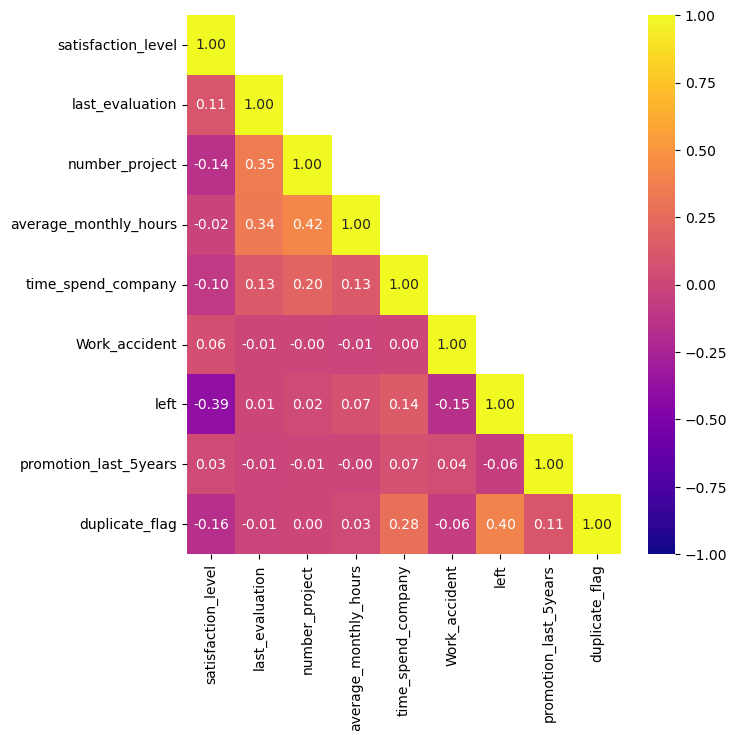

In [755]:
# 1. Correlation Matrix (numerical features, categorical not encoded )
plt.figure(figsize=(7, 7))
corel = df.corr(numeric_only=True)
sns.heatmap(corel, 
            annot=True, 
            cmap='plasma', 
            vmin=-1, 
            vmax=1,
            fmt=".2f",
            mask=np.triu(corel, k=1));
plt.show();

In [674]:
# Crreate a numerical features df
df_numeric = df.select_dtypes(include=np.number)
# Any number of feature pairs with correlation |abs| > 0.51
correlation_func(df_numeric, 0.51)

Number of feature pairs with correlation |abs| > 0.51: 0


### <span style="color: red">  Observation :
* There are NO significant correlation between features.
* The highest correlation coefficient is 0.42 between 'average monthly hours' and 'number_project', which makes sense. More projects means more time spent working on them.

### <span style="color: brown">  ----- 2.2. Draw the distribution plot of:
            ▪ Employee Satisfaction (use column satisfaction_level)
            ▪ Employee Evaluation (use column last_evaluation)
            ▪ Employee Average Monthly Hours (use column average_montly_hours)

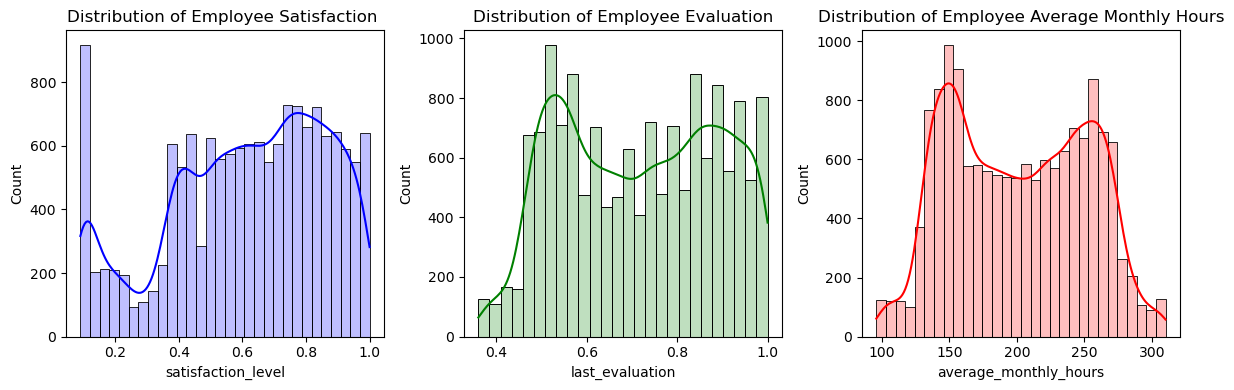

In [675]:
# Subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(df['satisfaction_level'], ax=axes[0], color='blue', kde=True, alpha=0.25)
axes[0].set_title('Distribution of Employee Satisfaction ')

sns.histplot(df['last_evaluation'], ax=axes[1], color='green', kde=True, alpha=0.25)
axes[1].set_title('Distribution of Employee Evaluation')

sns.histplot(df['average_monthly_hours'], ax=axes[2],  color='red', kde=True, alpha=0.25)
axes[2].set_title('Distribution of Employee Average Monthly Hours')

plt.tight_layout()
plt.show()


In [676]:
df['satisfaction_level'].mean().round(2)

0.61

In [677]:
df['last_evaluation'].mean().round(2)

0.72

In [678]:
df['average_monthly_hours'].mean().round(2)

201.05

### <span style="color: red">  Key Observation :
#### <span style="color: green">Employee Satisfaction (satisfaction_level)
    * The company has generally satisfied employees, but the left tail indicates a small dissatisfied group that may need attention.
#### <span style="color: green"> Employee Evaluation (last_evaluation)
    * Polarized performance - employees are either "average" or "top performers" with few in the middle. May reflect bias in ratings or individual levels of employees.
#### <span style="color: green"> Average Monthly Hours (average_monthly_hours)
    * Most employees have overtime hours. The long right tail highlights a subgroup at risk of burnout.
    
    * An average month usually has between 20 to 22 working days, equivalent to roughly four work weeks. This assumes a full-time employee working eight hours per day, amounting to approximately 160 to 176 hours of work monthly.
    * The average number of hours per month spent by an employee in the office of this company is 201, which is 20-25% more than the standard 8-hour working day.

### <span style="color: red">  Next :
    
    * Probably it makes sense to check whether this overtime work affects the level of employee satisfaction and their salary
    

Text(0.5, 1.0, 'Salary Distribution ')

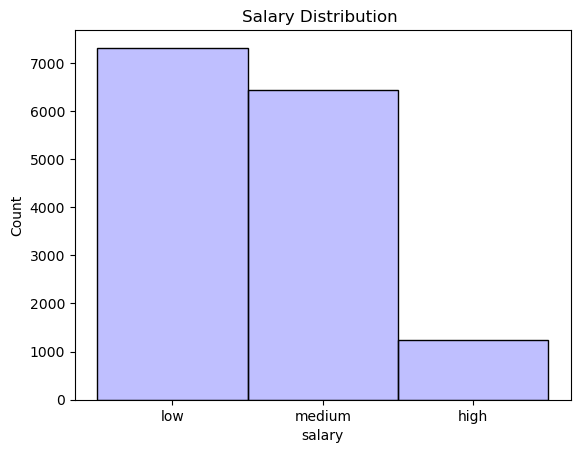

In [679]:
# Plot "Salary Distribution"
sns.histplot(df['salary'],color='blue', alpha=0.25)
plt.title('Salary Distribution ')

In [680]:
# Mean Satisfaction & Hours by Salary
df.groupby('salary')[['satisfaction_level', 'average_monthly_hours', 'number_project']].agg(['mean']).round(2)

,satisfaction_level,average_monthly_hours,number_project
,mean,mean,mean
salary,,,
high,0.64,199.87,3.77
low,0.60,201.00,3.80
medium,0.62,201.34,3.81


### <span style="color: red">  Observation :

    * The salary distribution is clearly right-skewed. Most employees have low or medium salary, while very few have a high salary.
    * Satisfaction tends to increase with salary: High (0.64) > Medium (0.62) > Low (0.60). But the difference is not huge (~3–4% spread). This suggests salary isn't strongly tied to working hours.
    * Average Monthly Hours and Number of Projects are very similar across salary levels, slight drop for high salary group.
    * Thus, overtime work doesn't affect the level of employee satisfaction and their salary.But despite higher pay, fewer projects, and fewer hours (on average), this group of employees is not completely satisfied with their jobs.

### <span style="color: brown"> ------- 2.3. Draw the bar plot of the employee project count of both employees who left and stayed in the organization 
     ▪ (use column number_project and hue column left), and give your inferences from the plot.

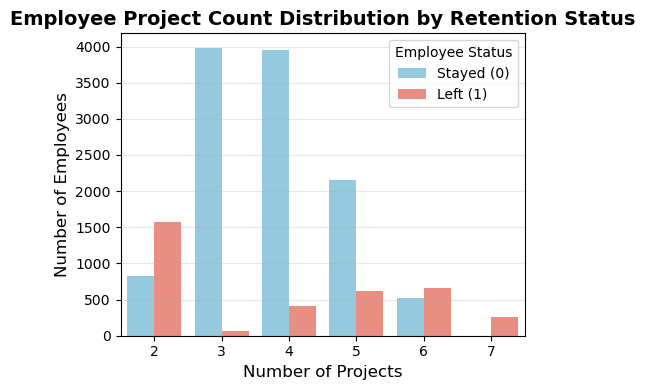

In [681]:
# Create the bar plot
plt.figure(figsize=(5, 4))

# Using seaborn countplot with hue
sns.countplot(data=df, x='number_project', hue='left', palette=['skyblue', 'salmon'])
plt.title('Employee Project Count Distribution by Retention Status', fontsize=14, fontweight='bold')
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Employee Status', labels=['Stayed (0)', 'Left (1)'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### <span style="color: red">  Observation : </span> 

#### <span style="color: green"> Work-Life Balance: </span>
    Extreme values (too few or too many projects) typically correlate with higher turnover
#### <span style="color: green"> Sweet Spot:</span>
    The project count range where retention is highest represents the optimal workload. Optimal number of projects are 3 - 5
#### <span style="color: green"> Underutilization Pattern: </span> 
    Employees with very few projects (e.g., 2 projects) show higher turnover, it suggests they might feel underutilized or bored
#### <span style="color: green"> Overwork Pattern: </span> 
    Employees with many projects (e.g., 6-7 projects) show higher turnover, it indicates burnout or excessive workload

## <span style="color: brown; font-weight:bold"> TASK_3:  Perform clustering of employees who left based on their satisfaction and evaluation. </span>

### <span style="color: brown">        ------- 3.1. Choose columns satisfaction_level, last_evaluation, and left.

In [682]:
# Create df for clustering
df_cluster = df[['satisfaction_level', 'last_evaluation', 'left']]
df_cluster.describe()

,satisfaction_level,last_evaluation,left
count,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,0.238083
std,0.248631,0.171169,0.425924
min,0.090000,0.360000,0.000000
25%,0.440000,0.560000,0.000000
50%,0.640000,0.720000,0.000000
75%,0.820000,0.870000,0.000000
max,1.000000,1.000000,1.000000


### <span style="color: brown">        ------- 3.2. Do K-means clustering of employees who left the company into 3 clusters? 

In [683]:
from sklearn.cluster import KMeans

In [684]:
(df_cluster['left'] ==0).sum()

11428

In [685]:
# Employees who left: df_cluster['left'] ==1
df_cluster = df_cluster[df_cluster['left'] !=0]
df_cluster.shape

(3571, 3)

In [756]:
df_cluster_left = df_cluster[['satisfaction_level', 'last_evaluation']]
df_cluster_left.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


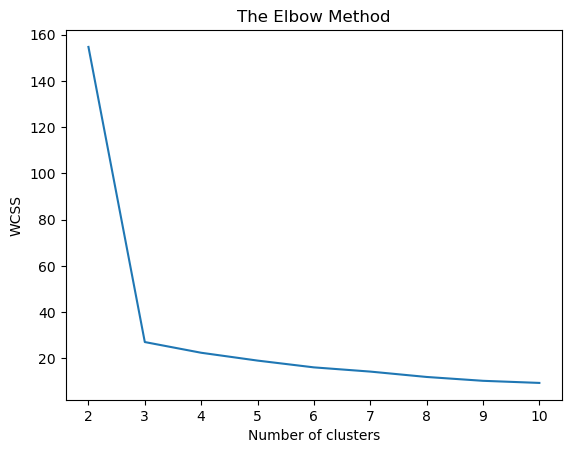

In [687]:
# Elbow Method
wcss = []
for i in range(2, 11):
    model = KMeans(n_clusters = i, n_init=10, init = 'k-means++', random_state = 42)
    model.fit(df_cluster_left)
    wcss.append(model.inertia_)
    
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [688]:
# Fit the model with the number of clusters = 3
model = KMeans(n_clusters=3, n_init=10, init='k-means++', random_state=42)
ccluster_kmeans = model.fit_predict(df_cluster_left)

In [689]:
# Define Cluster Centers
model.cluster_centers_

array([[0.41014545, 0.51698182],
       [0.80851586, 0.91170931],
       [0.11115466, 0.86930085]])

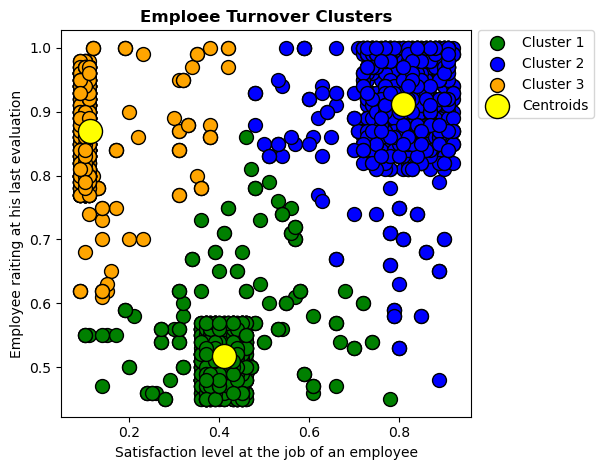

In [690]:
# Visualize the clusters
plt.scatter(df_cluster_left.iloc[ccluster_kmeans == 0, 0], df_cluster_left.iloc[ccluster_kmeans == 0, 1], s=100, c='green', label='Cluster 1', edgecolor="black")
plt.scatter(df_cluster_left.iloc[ccluster_kmeans == 1, 0], df_cluster_left.iloc[ccluster_kmeans == 1, 1], s=100, c='blue', label='Cluster 2', edgecolor="black")
plt.scatter(df_cluster_left.iloc[ccluster_kmeans == 2, 0], df_cluster_left.iloc[ccluster_kmeans == 2, 1], s=100, c='orange', label='Cluster 3', edgecolor="black")

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', edgecolor="black")
plt.title('Emploee Turnover Clusters', fontweight='bold')
plt.xlabel('Satisfaction level at the job of an employee')
plt.ylabel('Employee raiting at his last evaluation')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0.)
plt.tight_layout()

### <span style="color: brown">        ------- 3.3. Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

## <span style="color: red">  Observation : </span> 
### <span style="color: green"> Cluster 1: </span>

    Low level of evaluation and Medium-Low level of satisfaction at the job
    These are likely underperforming, dissatisfied employees. High concentration suggests this is a significant problem group. 
    Probably needs development support or performance management
    
### <span style="color: blue"> Cluster 2: </span> 

    High level of evaluation and High level of satisfaction at the job    
    Large, dense cluster indicates this is the core workforce. These employees are likely staying with the company
    Good idea is to learn more what keeps these employees both satisfied and high-performing
    
### <span style="color: orange"> Cluster 3: </span> 
    
    High level of evaluation but Low level of satisfaction at the job. Talented employees who might leave. 
    They're performing well but unhappy, possibly due to:
        ▪ Overwork/burnout
        ▪ Lack of recognition
        ▪ Poor management
        ▪ Limited growth opportunities
    perhaps those who have been working in the company for a long time and have received high ratings from management are not satisfied with something now. Maybe with some conditions that have arisen recently
    
### <span style="color: red"> Attention Needed  </span> Focus on understanding why high performers (Cluster 3) are dissatisfied before you lose valuable talent

## <span style="color: brown; font-weight:bold"> TASK_4: Handle the left Class Imbalance using the SMOTE technique.

### <span style="color: brown">        ------- 4.1. Pre-process the data by converting categorical columns to numerical columns by:
            ▪ Separating categorical variables and numeric variables
            ▪ Applying get_dummies() to the categorical variables
            ▪ Combining categorical variables and numeric variables

In [691]:
# Separating categorical variables and numeric variables
df_num = df.select_dtypes(include=np.number) 
df_cut = df.select_dtypes(exclude=np.number)

In [692]:
# Applying get_dummies() to the categorical variables
df_cut = pd.get_dummies(df_cut, columns=['department', 'salary'], prefix=['dept', 'salary'], dtype='int', drop_first=True)

In [693]:
# Combining categorical variables and numeric variables
df_encoded = pd.concat([df_num, df_cut], axis=1)

In [694]:
df_encoded.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.80,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2.00,5.00,7.00,5.00,2.00
average_monthly_hours,157.00,262.00,272.00,223.00,159.00
time_spend_company,3.00,6.00,4.00,5.00,3.00
Work_accident,0.00,0.00,0.00,0.00,0.00
left,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,0.00,0.00,0.00,0.00,0.00
duplicate_flag,1.00,1.00,1.00,1.00,1.00
dept_RandD,0.00,0.00,0.00,0.00,0.00


In [764]:
df_encoded.shape

(14999, 20)

### <span style="color: red"> Next :  </span> devide df['average_montly_hours'] by 100

In [695]:
df_encoded['average_monthly_hours'] = (df_encoded['average_monthly_hours'] / 100).round(2)

In [696]:
summary(df_encoded)

,Data Type,Memory Used,Nunique,Max,Min,Missing,Whitespace
Index,NaN,132,NaN,N/A,N/A,NaN,NaN
Work_accident,int64,119992,2.0,1.0,0.0,0.0,0.0
average_monthly_hours,float64,119992,215.0,3.1,0.96,0.0,0.0
dept_RandD,int64,119992,2.0,1.0,0.0,0.0,0.0
dept_accounting,int64,119992,2.0,1.0,0.0,0.0,0.0
dept_hr,int64,119992,2.0,1.0,0.0,0.0,0.0
dept_management,int64,119992,2.0,1.0,0.0,0.0,0.0
dept_marketing,int64,119992,2.0,1.0,0.0,0.0,0.0
dept_product_mng,int64,119992,2.0,1.0,0.0,0.0,0.0
dept_sales,int64,119992,2.0,1.0,0.0,0.0,0.0


### <span style="color: brown">        ------- 4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [697]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score

In [698]:
X = df_encoded.drop(columns='left')
y = df_encoded['left']

In [699]:
y.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

### <span style="color: red"> Note :  </span> Dataset imbalance

In [700]:
# train test split on 80-20 basis 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [701]:
# Imbalance y_train
y_train.value_counts()

left
0    9142
1    2857
Name: count, dtype: int64

### <span style="color: brown">        ------- 4.3.Upsample the train dataset using the SMOTE technique from the imblearn module.

In [702]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [703]:
# Balanced y_train
y_train_smote.value_counts()

left
0    9142
1    9142
Name: count, dtype: int64

## <span style="color: brown; font-weight:bold"> TASK_5: Perform 5-fold cross-validation model training and evaluate performance.

### <span style="color: brown">        ------- 5.1. Train a logistic regression model, apply a 5-fold CV, and plot the classification report.            

In [704]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold

#### <span style="color: brown">  ======= LR_Model 1.1. =======
#### <span style="color: green">  Full set, no balancing

In [712]:
# Initialize model
model_lr = LogisticRegression(max_iter=1000,  random_state=42)

# Perfom 5-fold CV and get prediction
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
y_pred = cross_val_predict(model_lr, X, y, cv=cv)

# Generate classification report
logr_report = classification_report(y, y_pred, output_dict=True)

# Convert report to df
df_logr_report = pd.DataFrame(logr_report).transpose()

In [713]:
print(f"LogisticRegression full_set StratifiedKFold cross_val technique: \n")
print("Classification Report")
df_logr_report.round(2)

LogisticRegression full_set StratifiedKFold cross_val technique: 

Classification Report


,precision,recall,f1-score,support
0,0.86,0.93,0.90,11428.00
1,0.71,0.53,0.61,3571.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.79,0.73,0.75,14999.00
weighted avg,0.83,0.84,0.83,14999.00


## <span style="color: red">  Observation : </span> 
### The class imbalance is significant



    * LogisticRegression struggles with minority class (Class 1):
    * Precision: 0.61 (39% false positives)
    * Recall: 0.35 (65% false negatives)
#### <span style="color: orange"> Class 0:  </span>     11,428 samples (76.2%)

#### <span style="color: blue"> Class 1:  </span>     3,571 samples (23.8%)underfitting

### <span style="color: red"> Next :  </span> will use SMOTE-technique

#### <span style="color: brown">  ======= LR_Model 1.2. =======
#### <span style="color: green">  Full set, SMOTE balanced

In [714]:
# SMOTE Applyed

# Initialize model
model_lr_S = LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42)

# Perform 5-fold CV and get prediction
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
y_pred_S = cross_val_predict(model_lr_S, X_train_smote, y_train_smote, cv=cv)

# Generate classification report
logr_report_S = classification_report(y_train_smote, y_pred_S, output_dict=True)

# Convert report to df
df_logr_report_S = pd.DataFrame(logr_report_S).transpose()

In [715]:
print(f"LogisticRegression, StratifiedKFold cross_val train_SMOTE technique: \n")
print("Classification Report")
df_logr_report_S.round(2)

LogisticRegression, StratifiedKFold cross_val train_SMOTE technique: 

Classification Report


,precision,recall,f1-score,support
0,0.80,0.79,0.8,9142.0
1,0.79,0.80,0.8,9142.0
accuracy,0.80,0.80,0.8,0.8
macro avg,0.80,0.80,0.8,18284.0
weighted avg,0.80,0.80,0.8,18284.0


### <span style="color: brown">  Visualization of Classification Reports

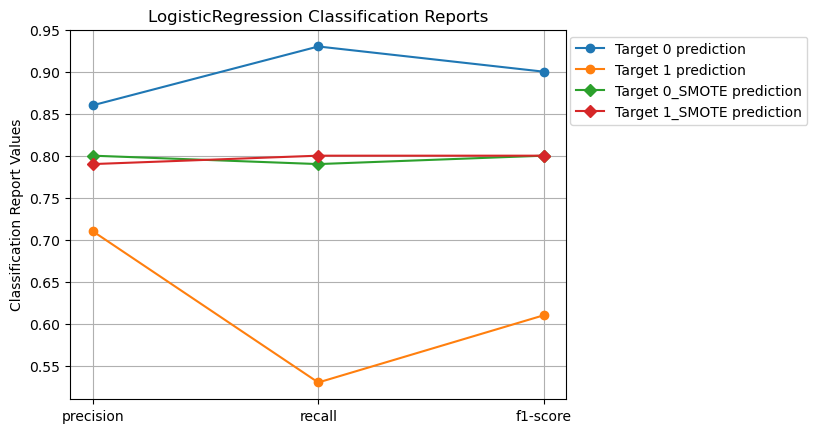

In [716]:
# Data for the graphs
x = ['precision', 'recall', 'f1-score']
y1 = df_logr_report.iloc[0, :3].round(2)
y2 = df_logr_report.iloc[1, :3].round(2)
y1_S = df_logr_report_S.iloc[0, :3].round(2)
y2_S = df_logr_report_S.iloc[1, :3].round(2)

# Plotting each graph on the same axes
plt.plot(x, y1, label='Target 0 prediction', marker='o')
plt.plot(x, y2, label='Target 1 prediction', marker='o')
plt.plot(x, y1_S, label='Target 0_SMOTE prediction', marker='D')
plt.plot(x, y2_S, label='Target 1_SMOTE prediction', marker='D')

# Adding labels, title, and legend
plt.xticks(ticks=[0, 1, 2], labels=x)

plt.ylabel('Classification Report Values')
plt.title('LogisticRegression Classification Reports')
plt.legend()
plt.grid(True)
# MLegend outside the plot
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', borderaxespad=0.5)
# Display the plot
plt.show()

### <span style="color: red">  Observation :  </span> 
#### <span style="color: orange"> Original data:</span> 
        Shows a class imbalance issue — Target 1 has much worse recall and f1.Precision is moderate for Target 1, but recall is very low, leading to low F1.
#### <span style="color: blue"> SMOTE-adjusted data: </span> 
        Much better balance between Target 0 and Target 1 scores. Recall and F1 for Target 1 are now much higher — great improvement from SMOTE.

### <span style="color: brown">        ------- 5.2. Train a RandomForest Classifier model, apply the 5-fold CV, and plot the classification report.

In [717]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedGroupKFold

#### <span style="color: brown">  ======= RF_Model 2.1. =======
#### <span style="color: green">  Full_set StratifiedKFold Cross-Validation

In [718]:
# Initialize model
model_rf = RandomForestClassifier(criterion="entropy", random_state=42)

# Perfom 5-fold CV and get prediction
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
y_pred = cross_val_predict(model_rf, X, y, cv=cv)

# Generate classification report
rf_report = classification_report(y, y_pred, output_dict=True)

# Convert report to df
df_rf_report = pd.DataFrame(rf_report).transpose()

print(f"RandomForestClassifier full_set StratifiedKFold cross_val technique: \n")
print("Classification Report")
print(df_rf_report.round(2))


RandomForestClassifier full_set StratifiedKFold cross_val technique: 

Classification Report
              precision  recall  f1-score   support
0                  0.99    1.00      0.99  11428.00
1                  0.99    0.97      0.98   3571.00
accuracy           0.99    0.99      0.99      0.99
macro avg          0.99    0.98      0.99  14999.00
weighted avg       0.99    0.99      0.99  14999.00


## <span style="color: red"> The Problem

The result is too good to be true. We, probably, have a data leakage problem in cross-validation setup due to duplicated rows

The duplicated rows are creating "identical twins" that can appear in both training and test sets during cross-validation, leading to artificially perfect performance. 

Unlike LogisticRegression, the RandomForestClassifier model essentially "memorizes" these patterns.

## <span style="color: green"> Solutions
    * Group-Aware Cross-Validation - to exclude the influence of duplicate rows 
    * Simple rf_model - due to 
            - duplicate records present
            - limited features (< 50 columns)
            - small dataset (< 20,000 samples)
    * SMOTE inside the CV loop (only on training folds)
    * StratifiedGroupKFold for robust model evaluation
    * Use imbalanced-learn's pipeline for robust SMOTE handling

#### <span style="color: brown">======= RF_Model 2.2. =======
#### <span style="color: green">  Using groups based on duplicate rows, Simple RF_model and SMOTE with Cross-Validation

In [719]:
# Create groups based on duplicated rows
def create_groups(df):
    # Create a unique identifier for each group of duplicates
    df_with_groups = df.copy()
    df_with_groups['group_id'] = df_with_groups.groupby(df_with_groups.columns.tolist()).ngroup()
    return df_with_groups['group_id']

# Get groups
groups = create_groups(X) 
model_simple = RandomForestClassifier(
    n_estimators=10,  # Fewer trees
    max_depth=3,      # Limit depth
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

# Define SMOTE and Model
smote = SMOTE(random_state=42)

# Create a pipeline: SMOTE + Model
pipeline = ImbPipeline([
    ('smote', smote),
    ('rf', model_simple)
])

# Group K-Fold CV
sgkf_cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation with predictions
y_pred = cross_val_predict(pipeline, X, y, cv=sgkf_cv, groups=groups)

# Evaluate
rf_report = classification_report(y, y_pred, output_dict=True)
df_rf_report_S = pd.DataFrame(rf_report).transpose()
print(f"RandomForestClassifier full_set (groups based on duplicate rows), StratifiedGroupKFold, SMOTE-cross_val technique: \n")
print("Classification Report")
print(df_rf_report_S.round(2))


RandomForestClassifier full_set (groups based on duplicate rows), StratifiedGroupKFold, SMOTE-cross_val technique: 

Classification Report
              precision  recall  f1-score  support
0                  0.95    0.93      0.94  11428.0
1                  0.78    0.83      0.80   3571.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.86    0.88      0.87  14999.0
weighted avg       0.91    0.90      0.90  14999.0


### <span style="color: brown">  Visualization of Classification Reports

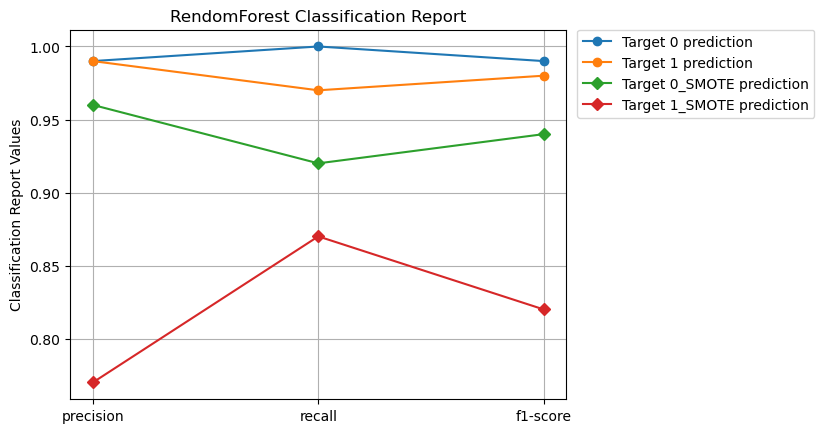

In [412]:
# Data for the graphs
x = ['precision', 'recall', 'f1-score']
y1 = df_rf_report.iloc[0, :3].round(2)
y2 = df_rf_report.iloc[1, :3].round(2)
y1_S = df_rf_report_S.iloc[0, :3].round(2)
y2_S = df_rf_report_S.iloc[1, :3].round(2)

# Plotting each graph on the same axes
plt.plot(x, y1, label='Target 0 prediction', marker='o')
plt.plot(x, y2, label='Target 1 prediction', marker='o')
plt.plot(x, y1_S, label='Target 0_SMOTE prediction', marker='D')
plt.plot(x, y2_S, label='Target 1_SMOTE prediction', marker='D')

# Adding labels, title, and legend
plt.xticks(ticks=[0, 1, 2], labels=x)

plt.ylabel('Classification Report Values')
plt.title('RendomForest Classification Report')
plt.legend()
plt.grid(True)
# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', borderaxespad=0.)
# Display the plot
plt.show()

### <span style="color: red">  Observation :  </span>
    * The model is biased toward the majority class (0), which is common in imbalanced datasets.
    * The combination of Group, SMOTE and GroupKFold provides better generalization for the minority class (1) while maintaining robustness of the estimation.

### <span style="color: brown">        ------- 5.3. Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

#### <span style="color: brown">  ======= GB_Model 3.1. =======
#### <span style="color: green">  Gradient Boosting Classifier full_set (groups based on duplicate rows), StratifiedGroupKFold, SMOTE-cross_val technique

In [727]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

smote = SMOTE(random_state=42)

# Create a pipeline: SMOTE + Model
pipeline = ImbPipeline([
    ('smote', smote),
    ('gb', model_gb)
])

# Group K-Fold CV
sgkf_cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Cross-validation with predictions
y_pred = cross_val_predict(pipeline, X, y, cv=sgkf_cv, groups=groups)

# Step 5: Evaluate
gb_report = classification_report(y, y_pred, output_dict=True)
df_gb_report_S = pd.DataFrame(gb_report).transpose()
print(f"Gradient Boosting Classifier full_set (groups based on duplicate rows), StratifiedGroupKFold, SMOTE-cross_val technique: \n")
print("Classification Report")
print(df_gb_report_S.round(2))

Gradient Boosting Classifier full_set (groups based on duplicate rows), StratifiedGroupKFold, SMOTE-cross_val technique: 

Classification Report
              precision  recall  f1-score   support
0                  0.98    0.97      0.98  11428.00
1                  0.92    0.95      0.93   3571.00
accuracy           0.97    0.97      0.97      0.97
macro avg          0.95    0.96      0.96  14999.00
weighted avg       0.97    0.97      0.97  14999.00


#### <span style="color: brown">  ======= GB_Model 3.2. =======
#### <span style="color: green">  Train the same model without duplicates to See if the performance holds up when no repeats exist.

In [721]:
# Initialize the GradientBoostingClassifier
model_gb_no_dupl = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Drop duplicates
df_unique = df_encoded.drop_duplicates()
X_unique = df_unique.drop(columns='left')
y_unique = df_unique['left']

smote = SMOTE(random_state=42)

# Create a pipeline: SMOTE + Model
pipeline = ImbPipeline([
    ('smote', smote),
    ('gb', model_gb_no_dupl)
])

# Group K-Fold CV
sgkf_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation with predictions
y_pred = cross_val_predict(pipeline, X_unique, y_unique, cv=sgkf_cv)

# Evaluate
gb_report_no_dupl = classification_report(y_unique, y_pred, output_dict=True)
df_gb_report_no_dupl_S = pd.DataFrame(gb_report_no_dupl).transpose()
print(f"Gradient Boosting Classifier full_set (no duplicate rows), StratifiedGroupKFold, SMOTE-cross_val technique: \n")
print("Classification Report")
print(df_gb_report_no_dupl_S.round(2))

Gradient Boosting Classifier full_set (no duplicate rows), StratifiedGroupKFold, SMOTE-cross_val technique: 

Classification Report
              precision  recall  f1-score   support
0                  0.99    0.98      0.98  10000.00
1                  0.89    0.94      0.91   1991.00
accuracy           0.97    0.97      0.97      0.97
macro avg          0.94    0.96      0.95  11991.00
weighted avg       0.97    0.97      0.97  11991.00


### <span style="color: red">  Interpretation:
    Performance is still very strong, but:
        * The F1-score for class 1 (minority class) dropped from 0.93 to 0.91
        * Precision for class 1 also dropped (from 0.91 → 0.88)
        * Overall accuracy remains high (97%)

    This confirms what we suspected:
        * The original performance (96%–97%) was slightly inflated due to duplicates. But not by a lot — the model is still learning real structure in the data.

    It means:
        * Model is not overfitting just because of duplicates.
        * Robust even after cleaning.
        * Handling class imbalance well (thanks to SMOTE).

#### <span style="color: brown">  ======= GB_Model 3.3. (weighted) =======
#### <span style="color: green">  Train the same model with drop all duplicate rows, but keep one representative from each group and assign a group weight equal to the number of times it originally appeared.

In [724]:
# Count duplicates
'''
    This line collapses duplicate rows in your DataFrame and counts how many times each unique row appears — 
    essentially summarizing all exact duplicates into a single row, with a column that tells you how often that row occurred.
'''
df_grouped = df_encoded.groupby(list(df_encoded.columns)).size().reset_index(name='weight')

# Separate features and target
X_weighted = df_grouped.drop(columns=['left', 'weight'])
y_weighted = df_grouped['left']
sample_weights = df_grouped['weight'] 

'''
    then pass the weight as sample_weight in model training to let the model know
    how common each row is — preserving the original data distribution without physical duplication.
'''

# Initialize the GradientBoostingClassifier
model_gb_weigh = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Cross-validation manually using sample_weight
sgkf_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true, y_pred = [], []

for train_idx, test_idx in sgkf_cv.split(X_weighted, y_weighted):
    X_train, X_test = X_weighted.iloc[train_idx], X_weighted.iloc[test_idx]
    y_train, y_test = y_weighted.iloc[train_idx], y_weighted.iloc[test_idx]
    w_train = sample_weights.iloc[train_idx]

    model_gb_weigh.fit(X_train, y_train, sample_weight=w_train)
    preds = model_gb_weigh.predict(X_test)

    y_true.extend(y_test)
    y_pred.extend(preds)

#  Evaluate
gb_report_weigh = classification_report(y_true, y_pred, output_dict=True)
df_gb_report_weigh = pd.DataFrame(gb_report_weigh).transpose()
print(f"Gradient Boosting Classifier weighted duplicate rows, StratifiedGroupKFold, manual cross_val technique: \n")
print("Classification Report")
print(df_gb_report_weigh.round(2))

Gradient Boosting Classifier weighted duplicate rows, StratifiedGroupKFold, manual cross_val technique: 

Classification Report
              precision  recall  f1-score   support
0                  0.99    0.99      0.99  10000.00
1                  0.96    0.93      0.94   1991.00
accuracy           0.98    0.98      0.98      0.98
macro avg          0.97    0.96      0.97  11991.00
weighted avg       0.98    0.98      0.98  11991.00


## <span style="color: brown">  Visualization of Classification Reports

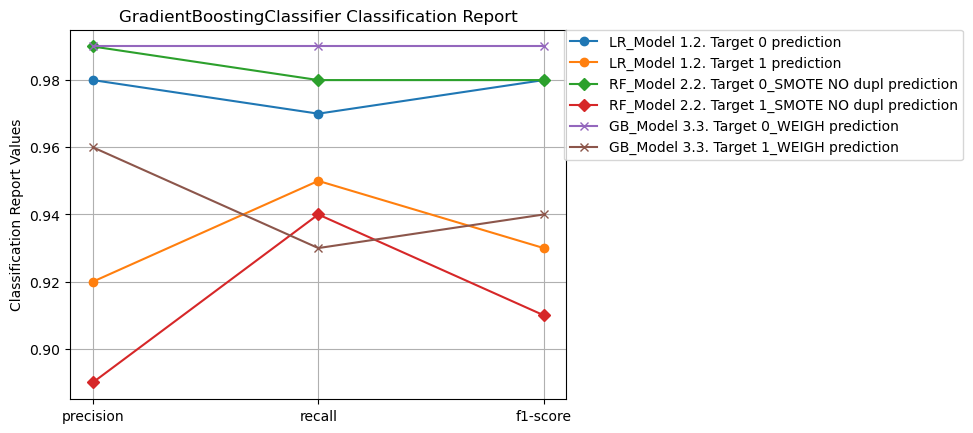

In [732]:
# Data for the graphs
x = ['precision', 'recall', 'f1-score']
y1_S = df_gb_report_S.iloc[0, :3].round(2)
y2_S = df_gb_report_S.iloc[1, :3].round(2)
y1_S_nodupl = df_gb_report_no_dupl_S.iloc[0, :3].round(2)
y2_S_nodupl = df_gb_report_no_dupl_S.iloc[1, :3].round(2)
y1_W = df_gb_report_weigh.iloc[0, :3].round(2)
y2_W = df_gb_report_weigh.iloc[1, :3].round(2)

# Plotting each graph on the same axes
plt.plot(x, y1_S, label='LR_Model 1.2. Target 0 prediction', marker='o')
plt.plot(x, y2_S, label='LR_Model 1.2. Target 1 prediction', marker='o')
plt.plot(x, y1_S_nodupl, label='RF_Model 2.2. Target 0_SMOTE NO dupl prediction', marker='D')
plt.plot(x, y2_S_nodupl, label='RF_Model 2.2. Target 1_SMOTE NO dupl prediction', marker='D')
plt.plot(x, y1_W, label='GB_Model 3.3. Target 0_WEIGH prediction', marker='x')
plt.plot(x, y2_W, label='GB_Model 3.3. Target 1_WEIGH prediction', marker='x')

# Adding labels, title, and legend
plt.xticks(ticks=[0, 1, 2], labels=x)

plt.ylabel('Classification Report Values')
plt.title('GradientBoostingClassifier Classification Report')

plt.grid(True)
# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right', borderaxespad=0.)
# Display the plot
plt.show()

### <span style="color: red">  Observation : </span> 
#### <span style="color: blue">    Logistic Regression: 
    * SMOTE improves recall significantly.
    * Still, logistic regression is too simple for complex, imbalanced data — it underperforms vs tree-based models.
#### <span style="color: green"> Random Forest:
    * RF_Model 2.1. (Full set, default) looks suspiciously high — it might be benefiting from data leakage via duplicates.
    * RF_Model 2.2. (Dedup/grouped + SMOTE + StratGroupKFold) is more realistic but lower-performing — suggesting RF doesn’t generalize as well after duplicates are handled correctly.
#### <span style="color: orange"> Gradient Boosting:
    * All GBoost versions perform strongly, even after deduplication.
    * GB_Model 3.3. (weighted + manual CV) has the highest precision, very high recall, and best balance overall. No need to physically oversample or use SMOTE
    * No sign of data leakage, strong generalization even after duplicates are handled.

## <span style="color: brown; font-weight:bold"> TASK_6: Identify the best model and justify the evaluation metrics used.

### <span style="color: brown">        ------- 6.1. Find the ROC/AUC for each model and plot the ROC curve.

In [733]:
from sklearn.metrics import roc_curve, roc_auc_score
# define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(
        n_estimators=10,
        max_depth=3,    
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

stcv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

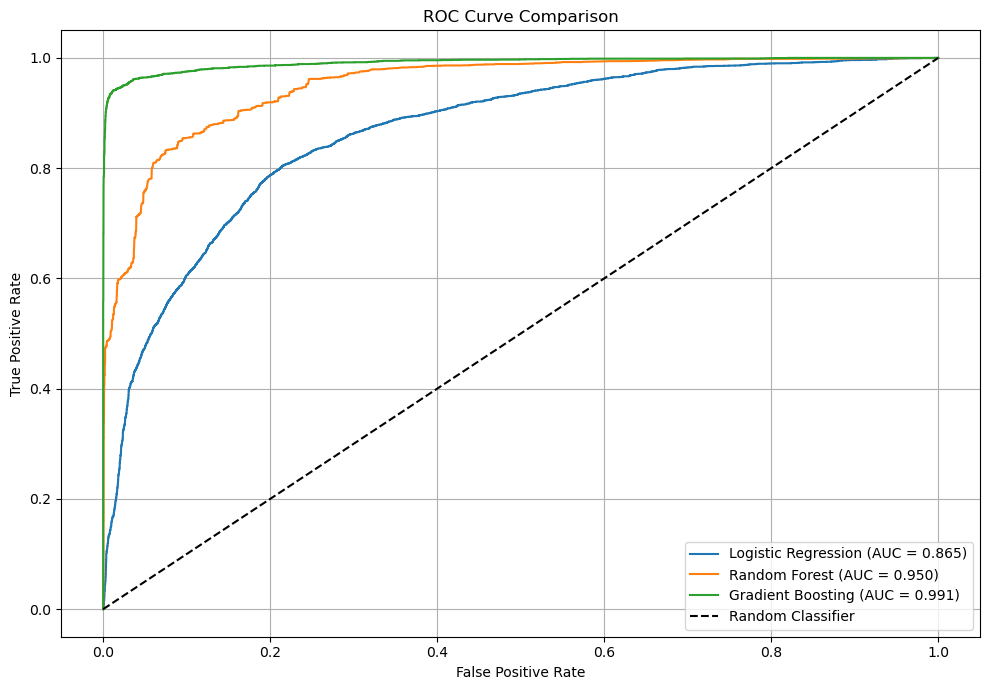

In [734]:
# Find the ROC/AUC for each model and plot the ROC curve.

plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_true_total = []
    y_proba_total = []

    for train_idx, test_idx in stcv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]

        y_true_total.extend(y_test)
        y_proba_total.extend(y_proba)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true_total, y_proba_total)
    auc = roc_auc_score(y_true_total, y_proba_total)

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### <span style="color: red">  Observation : </span> 
#### <span style="color: blue">    Logistic Regression (AUC = 0.821): 
    * Smooth curve showing gradual trade-offs between sensitivity and specificity
    * Shows decent performance but is significantly outperformed by the ensemble methods
#### <span style="color: green"> Random Forest (AUC = 0.953):
    * Excellent performance with a steep initial rise
#### <span style="color: orange"> Gradient Boosting (AUC = 0.989):
    * Nearly perfect performance with the curve hugging the top-left corner
    * Achieves very high true positive rates with minimal false positives

### <span style="color: brown">        ------- 6.2. Find the confusion matrix for each of the models.

Logistic Regression Confusion Matrix:
[[10637   791]
 [ 1671  1900]]

Random Forest Confusion Matrix:
[[11383    45]
 [ 1862  1709]]

Gradient Boosting Confusion Matrix:
[[11337    91]
 [  238  3333]]



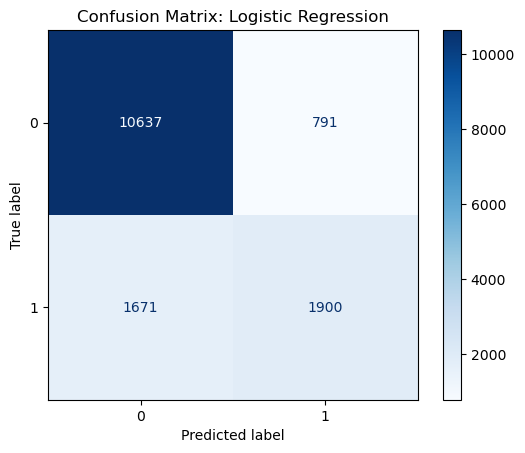

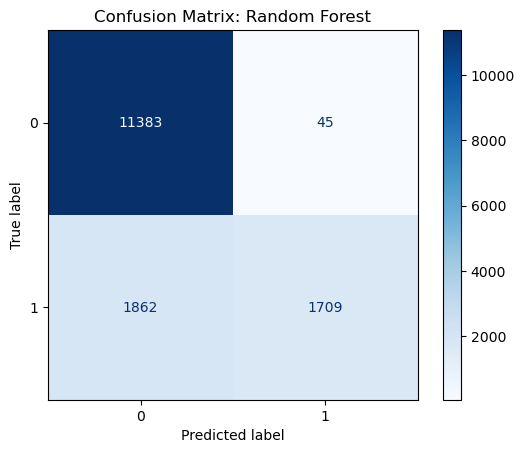

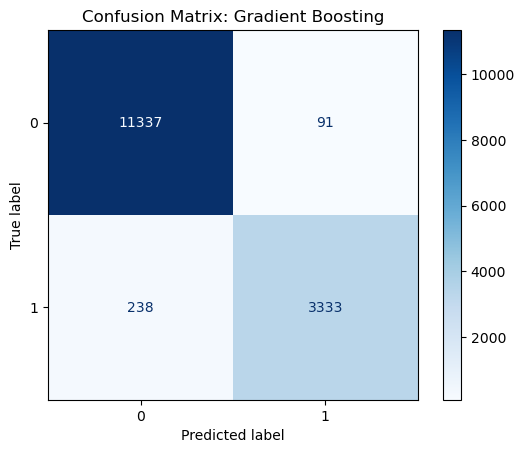

In [757]:
for name, model in models.items():
    y_true_all = []
    y_pred_all = []

    for train_idx, test_idx in stcv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_true_all, y_pred_all)

    print(f"{name} Confusion Matrix:\n{cm}\n")
    
    if name == 'Logistic Regression':
        df_cm_lr = pd.DataFrame(confusion_matrix(y_true_all, y_pred_all))
    elif name == 'Random Forest':
        df_cm_rf = pd.DataFrame(confusion_matrix(y_true_all, y_pred_all))
    else:
        df_cm_gb = pd.DataFrame(confusion_matrix(y_true_all, y_pred_all))
        
    
    # Plot it
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.grid(False)
    #plt.show()


### <span style="color: brown">        ------- 6.3. Explain which metric needs to be used from the confusion matrix: Recall or Precision?

In [758]:
# recal = TP / (TP + FN), precision = TP / (TP + FP)
def culc_re_pre (df):
    #df_metrix[]
    precision = df.iloc[1, 1] / (df.iloc[1, 1] + df.iloc[0, 1])
    recall = df.iloc[1, 1] / (df.iloc[1, 1] + df.iloc[1, 0])
    return round(precision, 3), round(recall, 3)

print("\n----- Recall & Precision baised on Confusion Matrix -----\n")
precision, recall = culc_re_pre (df_cm_lr)
print(f'Logistic Regression: \n \t precision {precision},  recall {recall}\n')
precision, recall = culc_re_pre (df_cm_rf)
print(f'Random Forest: \n \t precision {precision},  recall {recall}\n')
precision, recall = culc_re_pre (df_cm_gb)
print(f'Gradient Boosting: \n \t precision {precision},  recall {recall}\n')


----- Recall & Precision baised on Confusion Matrix -----

Logistic Regression: 
 	 precision 0.706,  recall 0.532

Random Forest: 
 	 precision 0.974,  recall 0.479

Gradient Boosting: 
 	 precision 0.973,  recall 0.933



### <span style="color: red">  Observation :  </span> 
    Target "left" means an employee left the company (class 1 people who left), so we likely care more about Recall as the primary metric from the confusion matrix — because: 
    
    * False Negatives are more costly inn our case than False Positives. 
    * Missing someone who's going to leave (False Negative) = lost chance to intervene. 
    * It's better to flag more potential leavers, even if a few don’t leave (False Positives).

## <span style="color: brown; font-weight:bold"> TASK_7: Suggest various retention strategies for targeted employees.

### <span style="color: brown">        ------- 7.1. Using the best model, predict the probability of employee turnover in the test data.

In [743]:
# The best model - Gradient Boosting Classifier
'''
    already done above:
df_grouped = df_encoded.groupby(list(df_encoded.columns)).size().reset_index(name='weight')
# Separate features and target
X_weighted = df_grouped.drop(columns=['left', 'weight'])
y_weighted = df_grouped['left']
sample_weights = df_grouped['weight'] 

'''
# Train final model on full weighted dataset
model_gb_final = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb_final.fit(X_weighted, y_weighted, sample_weight=sample_weights)

# Predict probability of class 1 (employee leaving)
y_proba = model_gb_final.predict_proba(X_test)[:, 1]

In [761]:
y_proba_full = model_gb_final.predict_proba(X_test)

In [762]:
y_proba_full

array([[0.09561042, 0.90438958],
       [0.03361093, 0.96638907],
       [0.01537539, 0.98462461],
       ...,
       [0.01537539, 0.98462461],
       [0.01146736, 0.98853264],
       [0.01537539, 0.98462461]])

In [760]:
y_proba

array([0.90438958, 0.96638907, 0.98462461, ..., 0.98462461, 0.98853264,
       0.98462461])

In [744]:
# Create a DataFrame of predictions
df_pred = X_test.copy()
df_pred['actual'] = y_test.values
df_pred['turnover_proba'] = y_proba.round(2)

### <span style="color: brown">        ------- 7.2. Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
            ▪ Safe Zone (Green) (Score < 20%)
            ▪ Low-Risk Zone (Yellow) (20% < Score < 60%)
            ▪ Medium-Risk Zone (Orange) (60% < Score < 90%)
            ▪ High-Risk Zone (Red) (Score > 90%).

In [745]:
# Categorize Turnover Probability Zones
def categorize_zone(p):
    if p < 0.20:
        return 'Green'
    elif p < 0.60:
        return 'Yellow'
    elif p < 0.90:
        return 'Orange'
    else:
        return 'Red'

df_pred['risk_zone'] = df_pred['turnover_proba'].apply(categorize_zone)

In [746]:
# Count employees in each zone
df_zone_counts = pd.DataFrame(df_pred['risk_zone'].value_counts().sort_index())

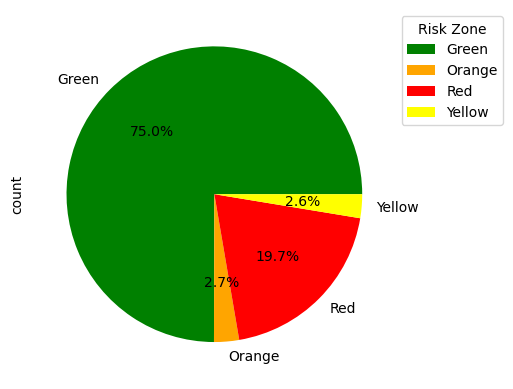

In [749]:
# Plotting from a DataFrame column
colors = sns.color_palette(['green', 'orange', 'red', 'yellow'])
df_zone_counts.plot.pie(y='count', colors=colors, autopct='%1.1f%%')
plt.legend(title='Risk Zone', bbox_to_anchor=(1.3, 1))

## <span style="color: red">  Retention Strategy by Zone : </span> 
#### <span style="color: green">  Safe Zone (Green): 
    * Stable and satisfied employees
    * Continue recognition and support
    * Offer growth opportunities
#### <span style="color: blue"> Low-Risk (Yellow):
    * Possibly disengaged but not yet critical
    * Encourage feedback
    * Offer team-building or learning perks
#### <span style="color: orange">  Medium-Risk (Orange):
    * Warning signs of dissatisfaction
    * Schedule 1-on-1s with managers
    * Review workload, compensation, or team climate
    * Identify and fix friction points
#### <span style="color: red">  High-Risk (Red):
    * Likely to leave soon
    * Urgent HR/manager intervention
    * Offer individual incentives (promotion, transfer)
    * Resolve complaints quickly